In [358]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [359]:
dataset = pd.read_csv('Marketing.csv')

In [360]:
dataset.shape

(200, 7)

In [361]:
dataset.head()

,TV,radio,newspaper,Google,Facebook,Linkedin,sales
0,230.1,37.8,69.2,267.9,160.9,107.0,22.1
1,44.5,39.3,45.1,83.8,-0.6,84.4,10.4
2,17.2,45.9,69.3,63.1,-52.1,115.2,9.3
3,151.5,41.3,58.5,192.8,93.0,99.8,18.5
4,180.8,10.8,58.4,191.6,122.4,69.2,12.9


In [362]:
dataset.describe()

,TV,radio,newspaper,Google,Facebook,Linkedin,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,170.306500,116.488500,53.818000,14.022500
std,85.854236,14.846809,21.778621,87.926689,87.369442,30.392927,5.217457
min,0.700000,0.000000,0.300000,10.700000,-72.500000,3.100000,1.600000
25%,74.375000,9.975000,12.750000,90.625000,42.575000,30.875000,10.375000
50%,149.750000,22.900000,25.750000,175.550000,124.450000,46.400000,12.900000
75%,218.825000,36.525000,45.100000,243.300000,183.900000,73.950000,17.400000
max,296.400000,49.600000,114.000000,332.700000,291.800000,150.600000,27.000000


In [363]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
mkt_report = sv.analyze(dataset)
#display the report
mkt_report.show_html('mkt.html')

                                             |          | [  0%]   00:00 -> (? left)

Report mkt.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [365]:
dataset.isnull().any()

TV           False
radio        False
newspaper    False
Google       False
Facebook     False
Linkedin     False
sales        False
dtype: bool

In [366]:
X = dataset[['TV', 'radio', 'newspaper', 'Google', 'Facebook', 'Linkedin']]
y = dataset['sales']

<Figure size 1500x1000 with 0 Axes>

/Users/bgoldb/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Google', ylabel='Density'>

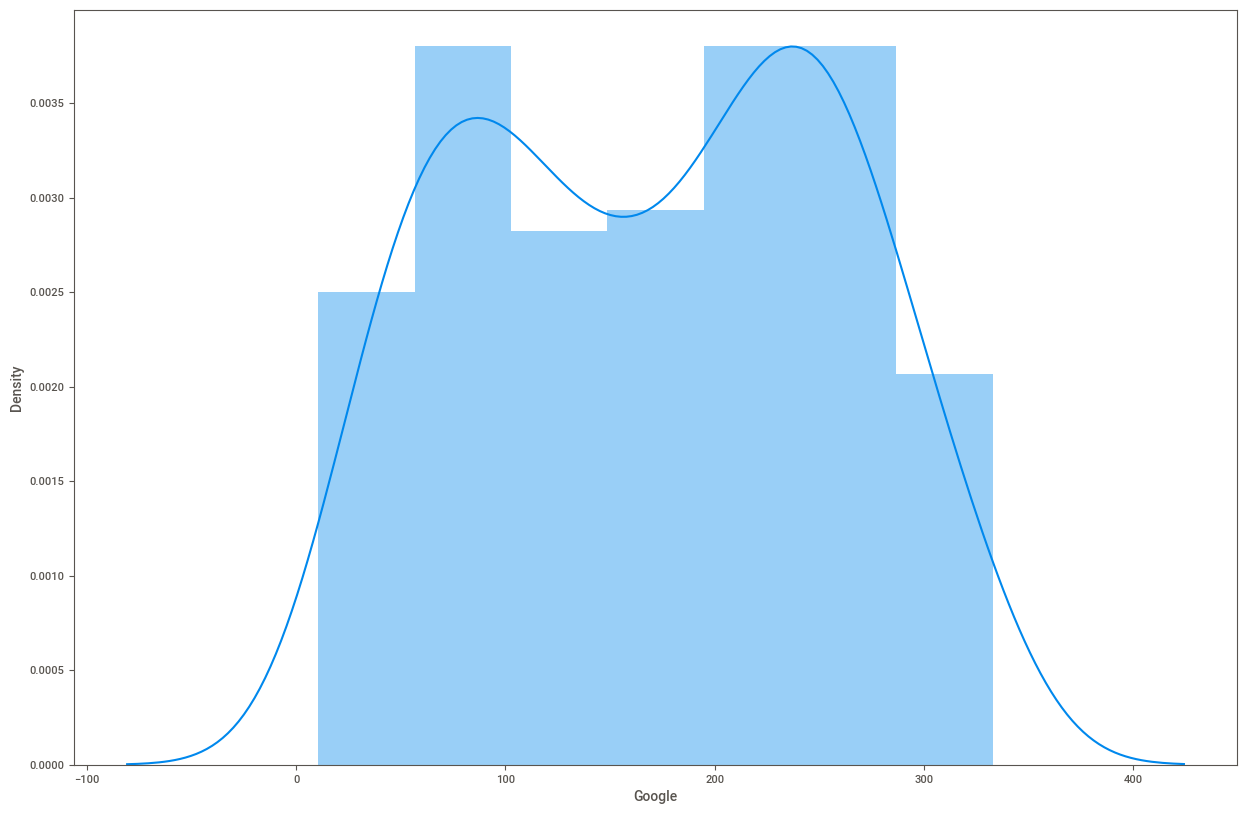

In [367]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(dataset['Google'])

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [369]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
regressor.intercept_, regressor.coef_


LinearRegression()

(2.9948930304953336,
 array([-0.02752761,  0.08779788, -0.03936899,  0.06027026,  0.01184137,
         0.04842889]))

In [370]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
TV,-0.027528
radio,0.087798
newspaper,-0.039369
Google,0.060270
Facebook,0.011841
Linkedin,0.048429


In [371]:
print("The intercept for model is {}".format(regressor.intercept_))

The intercept for model is 2.9948930304953336


In [372]:
y_pred = regressor.predict(X_test)

In [373]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(5)
df1

,Actual,Predicted
18,11.3,10.057396
170,8.4,7.452281
107,8.7,7.019708
98,25.4,24.080297
177,11.7,12.017863


In [374]:
regSeries = pd.Series([metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test,y_pred)])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 error', metrics.r2_score(y_test,y_pred))
regSeries

Mean Absolute Error: 1.3617813502090281
Mean Squared Error: 4.40211829144969
Root Mean Squared Error: 2.0981225634956813
r2 error 0.8601145185017867


0    1.361781
1    4.402118
2    2.098123
3    0.860115
dtype: float64

In [375]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.1)
ridge.fit(X_train, y_train)


Ridge(alpha=0.1)

In [376]:
coeff_df = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
TV,-0.027528
radio,0.087798
newspaper,-0.039369
Google,0.060270
Facebook,0.011841
Linkedin,0.048429


In [377]:
print("The intercept for model is {}".format(ridge.intercept_))

The intercept for model is 2.9948964350482363


In [378]:
y_pred = ridge.predict(X_test)

In [379]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(5)
df1

,Actual,Predicted
18,11.3,10.057395
170,8.4,7.452283
107,8.7,7.019714
98,25.4,24.080294
177,11.7,12.017868


In [380]:
ridgeSeries = pd.Series([metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test,y_pred)])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 error', metrics.r2_score(y_test,y_pred))
ridgeSeries

Mean Absolute Error: 1.361781079057735
Mean Squared Error: 4.4021135629867825
Root Mean Squared Error: 2.0981214366634697
r2 error 0.8601146687574742


0    1.361781
1    4.402114
2    2.098121
3    0.860115
dtype: float64

In [381]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [382]:
coeff_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])  
#fixing -0
coeff_df.iloc[2] = 0
coeff_df

,Coefficient
TV,0.000000
radio,0.146013
newspaper,0.000000
Google,0.044552
Facebook,0.000000
Linkedin,0.000000


In [383]:
print("The intercept for model is {}".format(lasso.intercept_))

The intercept for model is 3.0546875380021596


In [384]:
y_pred = lasso.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(5)
df1

,Actual,Predicted
18,11.3,10.044252
170,8.4,7.492831
107,8.7,7.139345
98,25.4,24.022246
177,11.7,12.123818


In [385]:
lassoSeries = pd.Series([metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test,y_pred)])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 error', metrics.r2_score(y_test,y_pred))
lassoSeries

Mean Absolute Error: 1.3636674512753513
Mean Squared Error: 4.324006528988853
Root Mean Squared Error: 2.0794245667945863
r2 error 0.8625966647729878


0    1.363667
1    4.324007
2    2.079425
3    0.862597
dtype: float64

,OLS,Ridge,Lasso
TV,-27.527614,-27.527505,0.000000
radio,87.797878,87.797691,146.012819
newspaper,-39.368985,-39.368846,0.000000
Google,60.270264,60.270186,44.551857
Facebook,11.841371,11.841341,0.000000
Linkedin,48.428893,48.428845,0.000000


<AxesSubplot:>

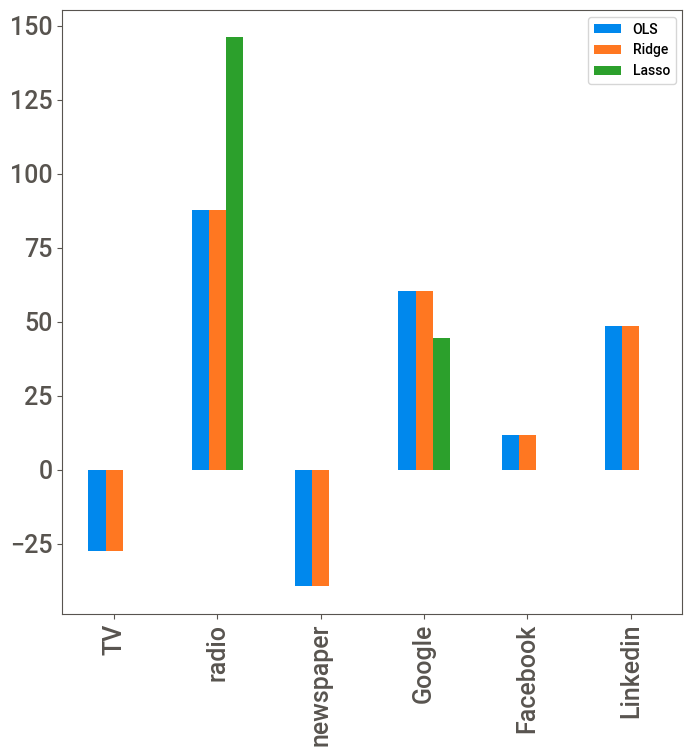

In [386]:
#Aggregate dataframes for coefficients and testing scores
#Coefficient
coeffdf = pd.DataFrame({'OLS':regressor.coef_*1000, 'Ridge':ridge.coef_*1000, 'Lasso':lasso.coef_*1000}, X.columns)
coeffdf
coeffdf.plot.bar(figsize = (8,8), fontsize=18)
#plt.rcParams.update({'font.size': 22})


In [387]:
#testing scores
testdf = pd.DataFrame({'OLS':regSeries, 'Ridge':ridgeSeries, 'Lasso':lassoSeries})
testdf.set_axis(['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R Squared Error'], axis = 0, inplace = True)
testdf

,OLS,Ridge,Lasso
Mean Absolute Error,1.361781,1.361781,1.363667
Mean Squared Error,4.402118,4.402114,4.324007
Root Mean Squared Error,2.098123,2.098121,2.079425
R Squared Error,0.860115,0.860115,0.862597


Business Problem: The goal of this assignment is to reduce the amount media channels that are not influencing sales as much as other media channels.I will use regression algorithms in machine learning (utilizing Python) to understand the performance of each media channel and its ultimate impact on sales.

Machine Learning Applications: 1) Predicting customer interaction through organic media. 2) Predicting potential sales qualified leads from customer interactions. 3) Predicting the amount of sales generated by a specific product in 2022.

Machine Learning Algorithms: 
OLS: Uses a typical y=mx+b approach and uses sum of least squares as a cost function to optimize results. Advantages: Simple implementation. Disadvantages: Prone to outliers, often underfit.
Ridge: A step further than OLS that uses an alpha value to help fit the function to the data. Uses penalization of the sum of squared coefficients. Advantages: Great to use when there is dependencies between variables. Disadvantages: introduces bias due to multicollinearity
Lasso: A step further than OLS that uses an alpha value to help fit the function to the data. Uses penalization of the sum of their absolute values. Advantages: Works well in sparsification. Disadvantages: Drives values to 0 due to use of sum of absolute values

Data Preprocessing Discussion: Checked data to confirm no null values. Next checked to ensure data did go outside of norms. Found Facebook data was negative but cannot rule out value without additional information. No information was missing from the dataset.

Explaining Metrics: I used R2 and MSE to determine model effectiveness. Using R2, I am looking for a value closest to 1. When using MSE, I am looking for a value closer to 0. Although Lasso had the highest R2 and lowest MSE, I determined Ridge was best for our analysis.

Interpreting Results: We are able to see, based on the coefficients, what the impact of spending would do on sales. We can see both Google and radio have the highest impact on sales with $60.27 and $87.80 respectively. We also found the 2 lowest performers were Newspaper and Linkedin and I suggest they be removed from the overall marketing strategy.

Recommended Steps: 2 of the biggest steps to optimizing model performance is to add more data and remove outliers. With review of the data, I determined there were no outliers and there is unfortunately no way to add more information. The last option is to choose the right estimator and compare performance between them. Using R2 and MSE values, we compared and made sure to use a highly performant linear regression method. We could play with the alpha variable to see if we could increase/decrease R2/MSE.